In [21]:

import aslid.model as model
import aslid.data as data
import numpy as np

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline



In [4]:
X, Y = data.load_training_data('data/train.csv', 'data/sign_to_prediction_index_map.json', limit=1000)
X = data.make_uniform(X, nframes=30)


100%|██████████| 1000/1000 [00:11<00:00, 90.41it/s]


In [5]:
print('N, frames, landmarks, coordinates')
print(X.shape)

N, frames, landmarks, coordinates
(1000, 30, 543, 3)


In [23]:
process_right = Pipeline(
    [
        (
            "extract",
            model.ExtractHandsTransformer(
                offset=model.ROWS_OFFSET_RIGHT, rows_per_frame=model.ROWS_PER_HAND
            ),
        ),
        ("imppute", model.FillNA(0)),
        ("passthrough", model.IdentityTransformer()),
    ]
)
process_left = Pipeline(
    [
        (
            "extract",
            model.ExtractHandsTransformer(
                offset=model.ROWS_OFFSET_LEFT, rows_per_frame=model.ROWS_PER_HAND
            ),
        ),
        ("impute", model.FillNA(0)),
        ("passthrough", model.IdentityTransformer()),
    ]
)
rh_X = process_right.fit_transform(X)
lh_X = process_left.fit_transform(X)


In [24]:
print('N, Frames, Landmarks, Coordinates')
print(rh_X.shape)
print(lh_X.shape)

N, Frames, Landmarks, Coordinates
(1000, 30, 21, 3)
(1000, 30, 21, 3)


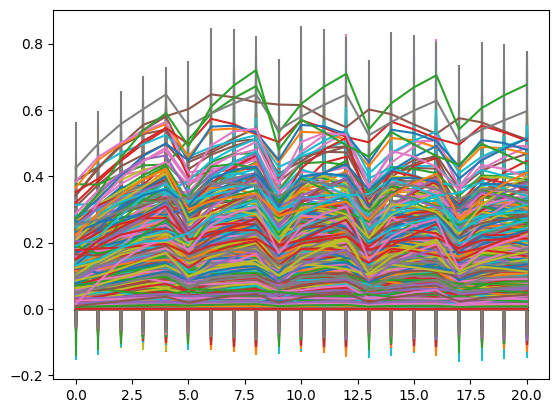

In [25]:
coord = 0
for n in range(rh_X.shape[0]):
    std = [rh_X[n, :, landmark, coord].std() for landmark in range(rh_X.shape[2])]
    mean = [rh_X[n, :, landmark, coord].mean() for landmark in range(rh_X.shape[2])]
    x = np.arange(rh_X.shape[2])

    plt.errorbar(x, mean, yerr=std)
    plt.xlabel("Landmark Index")
    plt.ylabel("Average X Position")
